Name: Yashika Patil  
Roll No: 19339  
Computer Vision Assignment


#Q.1
Write the pseudocode for the SIFT descriptor and few
lines in which scenarios such a descriptor will be useful?

In [ ]:
for i = 1 to range(size(n,m)):
    dn = (n(i)- (feature_width/2)) : (n(i) + (feature_width/2) -1)
    dm = (m(i)- (feature_width/2)) : (m(i) + (feature_width/2) -1)  
    sift_des = zeros(cw, cw, 10)
    for j = 1:10
        grad = gradient(dn,dm).gaussian()
        orien = orientation(dn,dm)
        for x=1 to range(cw)
            for y=1 to range(cw)
                cn = ((x-1)*cw+1):(x*cw)
                cm = ((y-1)*cw+1):(y*cw)
                cg = grad(cn,cm)
                co = o(cn,cm)
                c = cg(co == j)
                sift_des(x,y,j) = sum(c(:))
            end for
        end for
    end for
sift_des = sift_des./max(sift_des())
sift_des(sift_des > 0.1) = 0.1
sift_des = sift_des./max(sift_des())
n_feature(i,:) = sift_des(:)
end for

Advantage: The SIFT feature descriptor is insensitive to uniform scaling, orientation of an image.

#Q.2 
Implement the viola-jones appropriate to
detect faces. Explain your steps in brief (your approach)
and general steps in the algorithm.       



Approach:   
Loaded the cascade    
Read the input image and converted to grayscale    
Detected the face using detectMultiScale   
Drew rectangle around the face    
Resized and displayed the image  


In [ ]:
from google.colab.patches import cv2_imshow

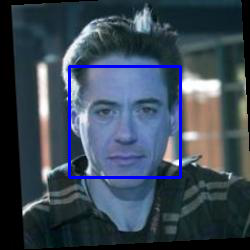

In [ ]:
import cv2 as cv
from skimage import io

face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

img = io.imread('Robert_Downey_Jr_0001.jpg')

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

face = face_cascade.detectMultiScale(gray_img, 1.1, 4)

for (x, y, w, h) in face:
    cv.rectangle(img, (x, y), (x + w, y + h), (250, 0, 0), 2)

dim = (250, 250)  
resized = cv.resize(img, dim, interpolation = cv.INTER_AREA) 
cv2_imshow(resized)


General steps of the Viola Jones   
Selecting Haar-like features   
Creating an integral image    
Running AdaBoost training    
Creating classifier cascades 

# Q.3 
Given the image “touching_grayscale”, (pls convert to
grayscale first), implement a clustering method of your
choice to separate the objects (that are touching). Use
appropriate methods to show your result images before
clustering and after to display the results.

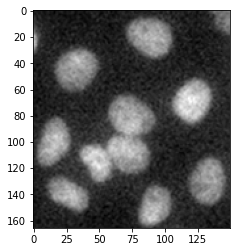

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
	
img = cv2.imread('tounching_grayscale.png', 0)

gray_img = plt.imshow(img, cmap='gray')

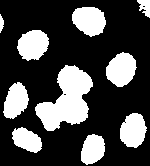

In [ ]:
from google.colab.patches import cv2_imshow
  
# Otsu thresholding

ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)       
cv2_imshow(thresh1)         
     
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows() 

In [ ]:
# K-means clustering

from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pixels = img.reshape((-1,3))
 
# Converting to float type
pixels = np.float32(pixels)

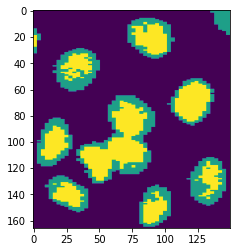

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# Performing k-means clustering with clusters = 3
# Initally random centres are choosen for k-means clustering

retval, labels, centers = cv2.kmeans(pixels, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# Converting the data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Changing the dimensions of the data
segmented_img = segmented_data.reshape((img.shape))

# Displaying the image after segmentation
plt.imshow(segmented_img)

In [ ]:
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import imutils

In [ ]:
# Finding contours in the thresholded image

contours = cv2.findContours(thresh1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
print("{} unique contours found".format(len(contours)))

10 unique contours found


In [ ]:
for (i, c) in enumerate(contours):

	# Draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

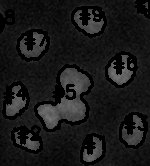

-1

In [ ]:
# The output image
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
#Watershed clustering

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('tounching_grayscale.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Removing the noise
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
closing = cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

In [ ]:
# sure background area
bg = cv2.dilate(closing,kernel,iterations=3)

# Finding Sure foreground area
dist_trans = cv2.distanceTransform(bg,cv2.DIST_L2,3)

In [ ]:
# Threshold
ret, fg = cv2.threshold(dist_trans,0.1*dist_trans.max(),255,0)

In [ ]:
# Finding unknown region
fg = np.uint8(fg)
unknown_reg = cv2.subtract(bg, fg)

# Marker labelling
ret, labels = cv2.connectedComponents(fg)

# Sure background should be 1 at least, hence add 1 to all labels
labels = labels + 1

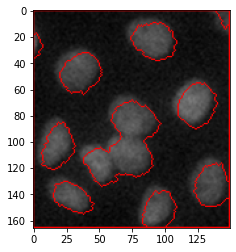

In [ ]:
# Regions of unknown with zero
labels[unknown_reg == 255] = 0

labels = cv2.watershed(img,labels)
img[labels == -1] = [255,0,0]
plt.imshow(img)

#Q.4 
Given the binary image (shapes.png), find the eccentricity
and bounding-box of the objects within the image using 8-connected components. Display your results. (this image has
been given to you already in the coding session, please use
the same).

In [ ]:
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import skimage
import skimage.io as io

img4 = cv2.imread('shapes.png')

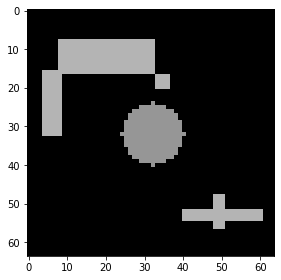

In [ ]:
gray_img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)
io.imshow(img4)

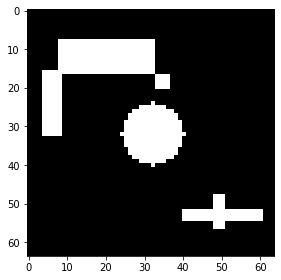

In [ ]:
ret, thresh = cv2.threshold(gray_img4, 100, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   
io.imshow(thresh)         
       
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows() 

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


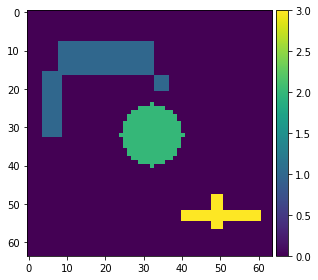

In [ ]:
#connected components

con_components = cv.connectedComponents(thresh, 8)[1]
io.imshow(con_components)

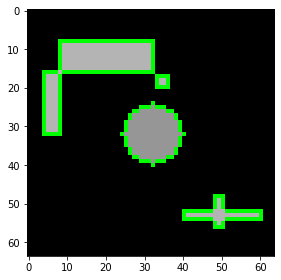

In [ ]:
#bounding boxes

cnt, hrchy = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
rgb = cv.cvtColor(gray_img4, cv.COLOR_GRAY2BGR)
cv.drawContours(rgb, cnt, -1, (0,255,0))
io.imshow(rgb)

In [ ]:
for c in range(len(cnt)):
    x,y,w,h = cv.boundingRect(cnt[c])
    cv.rectangle(rgb , (x, y), (x + w, y + h), (255,0,0), 1)
    cv.putText(rgb, f"{c+1}", (int(x+w/2), int(y+h/2)), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, (255,255,0), 1)
    print(f"Eccentricity of box {c+1} is: ", h/w)

Eccentricity of box 1 is:  0.42857142857142855
Eccentricity of box 2 is:  1.0
Eccentricity of box 3 is:  0.7575757575757576


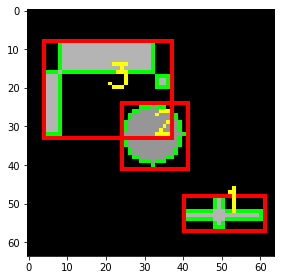

In [ ]:
io.imshow(rgb)

#Q.5 
Self-study+assignment question: Local Feature Matching
using Harris Corners and SURF.
Just like the SIFT descriptor that we already discussed in the
class, there is another descriptor called the SURF descriptor.
(we are familiar with these concepts in parts already). Briefly
explain the steps that are built into this descriptor in your
own words.
Pick seemingly two different views of any monument building
in the world (find 2 images at 2 different view). Apply the
Harris corner and SURF detectors on them. Also comment on
how the methods work on any “repetitive structures” within
the images (i.e whether such points are unique features or
not and can be helpful for finding similarities)?

In [ ]:
import cv2 as cv
import numpy as np

img1 = cv.imread('Angle1.jpg')
img2 = cv.imread('Angle2.jpg')

In [ ]:
gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY) 

In [ ]:
gray_img1 = np.float32(gray_img1)
gray_img2 = np.float32(gray_img2)

In [ ]:
# Applying Harris Corner detection method 

har_cor1 = cv.cornerHarris(gray_img1, 5, 5, 0.07)
har_cor2 = cv.cornerHarris(gray_img2, 5, 5, 0.07)

In [ ]:
har_cor1 = cv.dilate(har_cor1, None)
har_cor2 = cv.dilate(har_cor2, None)

In [ ]:
img1[har_cor1 > 0.01 * har_cor1.max()]=[0, 0, 255]
img2[har_cor2 > 0.01 * har_cor2.max()]=[0, 0, 255]

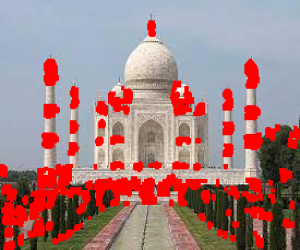

In [ ]:
from google.colab.patches import cv_imshow

dim = (300, 250)  
resized1 = cv.resize(img1, dim, interpolation = cv.INTER_AREA) 
cv_imshow(resized1)

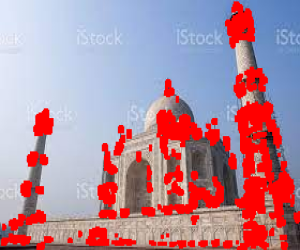

In [ ]:
dim = (300, 250)  
resized2 = cv.resize(img2, dim, interpolation = cv.INTER_AREA) 
cv_imshow(resized2)

In [ ]:
# Using ORB

#Reading and converting them to grayscale again

orb_img1 = cv.imread('Angle1.jpg')
orb_img2 = cv.imread('Angle2.jpg')

In [ ]:
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

In [ ]:
orb = cv.ORB_create()

In [ ]:
queryKeypoints, queryDescriptors = orb.detectAndCompute(gray1,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(gray2,None)

In [ ]:
matcher = cv.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

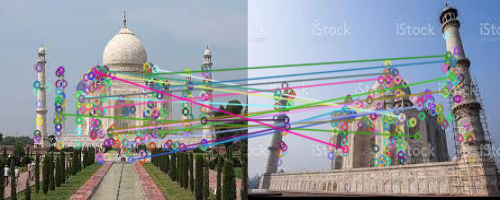

In [ ]:
matches_img = cv.drawMatches(orb_img1, queryKeypoints, orb_img2, trainKeypoints, matches[:20],None)

matches_img = cv.resize(matches_img, (500,200))

cv_imshow(matches_img)

#Q.6 
On the same database: https://www.kaggle.com/ciplab/
real-and-fake-face-detections , Apply HoG descriptor. Use the
HoG features to classify face versus non-faces using SVM
(binary classification). Evaluate the results.

In [ ]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
from random import shuffle
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from zipfile import ZipFile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
real_imgs = "/content/drive/MyDrive/real"
fake_imgs = "/content/drive/MyDrive/fake"

In [ ]:
real_imgs_path = os.listdir(real_imgs)
fake_imgs_path = os.listdir(fake_imgs)

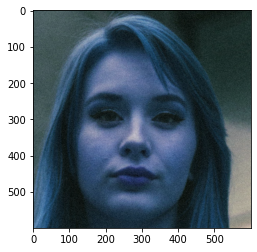

In [ ]:
#printing one of the images of real face 
plt.imshow(cv.imread(os.path.join(real_imgs, real_imgs_path[500])))

In [ ]:
img_size = (128)

In [ ]:
# For generating data

def data():

    training = []
    t=[]
    for img in tqdm(real_imgs_path):
        path = os.path.join(real_imgs, img)

        try:
            img1 = cv.resize( cv.imread(path,0), (img_size, img_size) )
            training.append(np.array(img1))
            t.append(1)
        except:
            continue
        
    for img in tqdm(fake_imgs_path):
        path = os.path.join(fake_imgs, img)
        
        try:
            img2 = cv.resize(cv.imread(path,0), (img_size, img_size))
            training.append(np.array(img2))  
            t.append(0)
        except: continue
        
    return(training, t)
gray_data, labels = data()

100%|██████████| 960/960 [00:13<00:00, 73.52it/s]


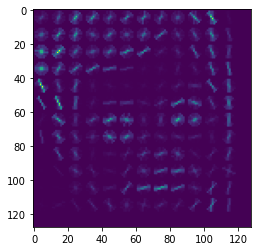

In [ ]:
# HoG filter

hog_imgs = []
hog_features = []

for image in gray_data:
    fd,hog_img = hog(image, orientations=10, pixels_per_cell=(10,10),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
    hog_imgs.append(hog_img)
    hog_features.append(fd)

# displaying image with HoG filter
plt.imshow(hog_imgs[20])

In [ ]:
# SVM

labels =  np.array(labels).reshape(len(labels),1)
clf = svm.SVC()

hog_features = np.array(hog_features)
dataframe = np.hstack((hog_features, labels))
np.random.shuffle(dataframe)

In [ ]:
# HoG feature array of any image
hog_features[10]

# Dividing 
train = int(len(hog_features)*0.8)

x_train, x_test = dataframe[:train,:-1],  dataframe[train:,:-1]
y_train, y_test = dataframe[:train,-1:].ravel() , dataframe[train:,-1:].ravel()

In [ ]:
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6161369193154034


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.52      0.57       197
         1.0       0.61      0.71      0.66       212

    accuracy                           0.62       409
   macro avg       0.62      0.61      0.61       409
weighted avg       0.62      0.62      0.61       409



#Q.7 
A subset of the Modified National Institute of Standards
and Technology database (MNIST) dataset is given to you.
MNIST is a commonly used dataset in the field of neural
networks. Download the set of training images and labels
from http://yann.lecun.com/exdb/mnist/.
 The images are of 28-by-28 pixels. Extract the HoG features
that are also useful for Optical Character Recognition (OCR)
of the training set and use the test set for testing. You need
to use a multi-class model here. Evaluate the results. 

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
import struct
import numpy as np 
import json
import os
from tqdm import tqdm
from random import shuffle
import pandas as pd
import gzip
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images_path = '/content/drive/MyDrive/train-images.idx3-ubyte'
labels_path = '/content/drive/MyDrive/train-labels.idx1-ubyte'

In [ ]:
with open(images_path, 'rb') as f1:
    magic, size = struct.unpack('>II', f1.read(8))
    nrows, ncols = struct.unpack('>II', f1.read(8))
    f1_data = np.fromfile(f1, dtype=np.dtype(np.uint8)).newbyteorder(">")
    f1_data = data.reshape((size,nrows,ncols))

with open(labels_path, 'rb') as f2:
    magic, size = struct.unpack('>II', f2.read(8))
    f2_data = np.fromfile(f2, dtype=np.dtype(np.uint8)).newbyteorder(">") 
    
f1_data, labels = f1_data, f2_data

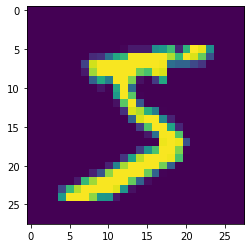

In [ ]:
from google.colab.patches import cv2_imshow

plt.imshow(data[0])

In [ ]:
# HOG Descriptor

hog_images = []
hog_features = []

In [ ]:
for image in tqdm(data):
  fd,hog_image = hog(image, orientations=8, pixels_per_cell=(8,8),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
  hog_images.append(hog_image)
  hog_features.append(fd)

100%|██████████| 60000/60000 [02:01<00:00, 494.48it/s]


In [ ]:
hog_features = np.array(hog_features)

In [ ]:
hog_features.shape

(60000, 128)

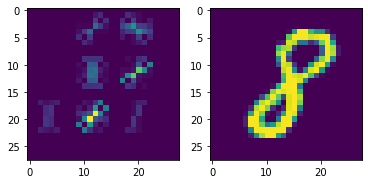

In [ ]:
#comparing images of HoG filter
plt.subplot(121)
plt.imshow(hog_images[343])
plt.subplot(122)
plt.imshow(data[343])

In [ ]:
labels = np.asarray(labels)
X_train, X_test, y_train, y_test = train_test_split(hog_features,labels,test_size=0.2)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
# Kneighbor Classifier

kn_classifier = KNeighborsClassifier(n_neighbors=3, algorithm='auto')
kn_classifier.fit(X_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
acc = kn_classifier.score(scaler.transform(X_test), y_test)
print(acc*100)

94.08333333333333


#Q.9
Download the CIFAR10. Use a pre-trained model and build
your code for image classification using transfer learning. 

In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
n = 10
print("Before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n)

print("After one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test, n)

Before one-hot encoding:  (50000, 1)
After one-hot encoding:  (50000, 10)


In [ ]:
model = Sequential()

In [ ]:
# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# flatten output
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 [==============================] - 45s 23ms/step - loss: 1.4849 - accuracy: 0.4587 - val_loss: 1.1313 - val_accuracy: 0.5946
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0723 - accuracy: 0.6210 - val_loss: 0.9368 - val_accuracy: 0.6739
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9238 - accuracy: 0.6764 - val_loss: 0.8446 - val_accuracy: 0.7053
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8243 - accuracy: 0.7147 - val_loss: 0.7838 - val_accuracy: 0.7332
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7534 - accuracy: 0.7393 - val_loss: 0.7207 - val_accuracy: 0.7523
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.6974 - accuracy: 0.7580 - val_loss: 0.7484 - val_accuracy: 0.7485
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6551 - accuracy: 0.7720 - val_loss: 0.6946 -

Transfer Learning with VGG16

In [ ]:
from keras.models import load_model
import numpy as np
from tqdm import tqdm
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
import pandas as pd
from keras.utils import np_utils

vgg = VGG16(weights="imagenet", input_shape=(32,32,3), include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
from keras.layers import Dense, Flatten, GlobalAveragePooling2D

trainable = vgg.output
trainable = GlobalAveragePooling2D()(trainable)

trainable = Dense(128, activation="relu")(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dense(10, activation="softmax")(trainable)

In [ ]:
from keras.models import Sequential, Model

model1 = Model(inputs = vgg.input, outputs=trainable)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model1.layers

for layer in model1.layers[:-4]:
    layer.trainable = False

In [ ]:
model1.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.3705 - accuracy: 0.5189 - val_loss: 1.2321 - val_accuracy: 0.5662
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.1830 - accuracy: 0.5844 - val_loss: 1.1913 - val_accuracy: 0.5811
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1275 - accuracy: 0.6052 - val_loss: 1.1604 - val_accuracy: 0.5946
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0819 - accuracy: 0.6233 - val_loss: 1.1559 - val_accuracy: 0.5962
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0472 - accuracy: 0.6321 - val_loss: 1.1361 - val_accuracy: 0.6093
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 1.0155 - accuracy: 0.6446 - val_loss: 1.1245 - val_accuracy: 0.6075
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9872 - accuracy: 0.6543 - val_loss: 1.1214 -